In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_ta as ta
import numpy as np
from scipy.signal import argrelextrema 
from plotly.subplots import make_subplots 
import plotly.graph_objects as go

In [9]:
# Define the ticker and date range
ticker = 'NVDA'
start_date = '2022-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch the data
data = yf.download(ticker, start=start_date, end=end_date, interval='1d') # Calculate RSI
data['RSI'] = ta.rsi(data['Close'], length=14)

[*********************100%%**********************]  1 of 1 completed


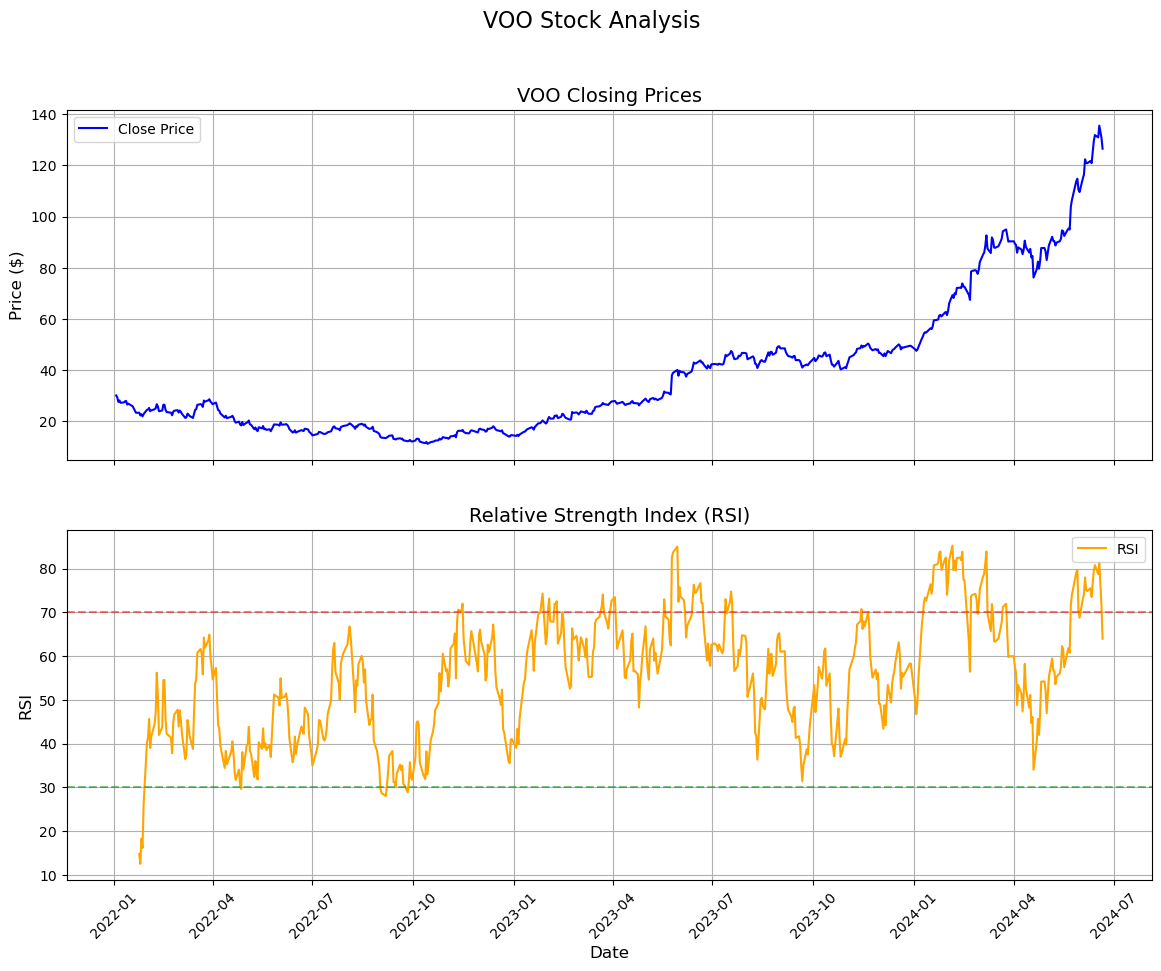

In [21]:
# Plot the closing prices and RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True) 
fig.suptitle('VOO Stock Analysis', fontsize=16)

# Plot closing prices
ax1.plot(data.index, data['Close'], label='Close Price', color='blue') 
ax1.set_title('VOO Closing Prices', fontsize=14)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True)

# Plot RSI
ax2.plot(data.index, data['RSI'], label='RSI', color='orange') 
ax2.set_title('Relative Strength Index (RSI)', fontsize=14) 
ax2.set_ylabel('RSI', fontsize=12)
ax2.axhline(70, linestyle='--', alpha=0.5, color='red') 
ax2.axhline(30, linestyle='--', alpha=0.5, color='green') 
ax2.legend()
ax2.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45) 
plt.xlabel('Date', fontsize=12) 
plt.show()

In [39]:
def find_extrema(data, order, how='hh'):
    extremas = None
    
    if how == 'hh':
        extremas = argrelextrema(data, comparator=np.greater, order=order)[0]

    if how == 'll':
        extremas = argrelextrema(data, comparator=np.less, order=order)[0]

    extremas_pairs = [extremas[i:i+2] for i in range(len(extremas) - 1)]
    return extremas_pairs

# Find extremas for price
hh_price = find_extrema(data['Close'].values, order=10, how='hh')
ll_price = find_extrema(data['Close'].values, order=10, how='ll')

fig = make_subplots(rows=2, cols=1, subplot_titles=("Price", "RSI"))

fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'], mode='lines', name='RSI'), row=2, col=1)

for h_line in hh_price:
    fig.add_trace(go.Scatter(x=data.index[h_line], y=data['Close'][h_line], mode='markers', marker=dict(size=10, color='blue', symbol='triangle-up')), row=1, col=1)

for l_line in ll_price:
    fig.add_trace(go.Scatter(x=data.index[l_line], y=data['Close'][l_line], mode='markers', marker=dict(size=10, color='red', symbol='triangle-down')), row=1, col=1)

for h_line_rsi in hh_price:
    fig.add_trace(go.Scatter(x=data.index[h_line_rsi], y=data['RSI'][h_line_rsi], mode='markers', marker=dict(size=10, color='blue', symbol='triangle-up')), row=2, col=1)

for l_line_rsi in ll_price:
    fig.add_trace(go.Scatter(x=data.index[l_line_rsi], y=data['RSI'][l_line_rsi], mode='markers', marker=dict(size=10, color='red', symbol='triangle-down')), row=2, col=1)

fig.update_xaxes(rangebreaks=[dict(bounds=["sat", "mon"])])

fig.show()